In [1]:
import ROOT
import root_numpy as rnp
import numpy as np

In [14]:
numufile = "new/local/km3_v4_numuCC_1.evt.JTE.root.aa.root"

In [22]:
recofile = "utilities/km3_v4_numucc_1.evt.JEnergy.aa.root"

In [45]:
ch_id = rnp.root2array(numu_file, treename="E", branches="Evt.hits.channel_id")
dom_id = rnp.root2array(numu_file, treename="E", branches="Evt.hits.dom_id")
trig = rnp.root2array(numu_file, treename= "E", branches="Evt.hits.trig")
t = rnp.root2array(numu_file, treename="E", branches="Evt.hits.t")
times = np.asarray([t[evt][trig[evt]==True] for evt in range(t.size)])

In [23]:
ch_id_reco = rnp.root2array(recofile, treename="E", branches="Evt.hits.channel_id")
dom_id_reco = rnp.root2array(recofile, treename="E", branches="Evt.hits.dom_id")
trig_reco = rnp.root2array(recofile, treename= "E", branches="Evt.hits.trig")
t_reco = rnp.root2array(recofile, treename="E", branches="Evt.hits.t")
times_reco = np.asarray([t[evt][trig[evt]==True] for evt in range(t.size)])

In [17]:
dom_id[0][trig[0]==1].shape

(10,)

In [24]:
dom_id_reco[0][trig_reco[0]==1].shape

(23,)

In [28]:
mc_trk_pos_x = rnp.root2array(recofile, treename="E", branches="Evt.mc_trks.pos.x")

In [34]:
mc_trk_pos_x[0].shape

(20,)

In [35]:
numu_file = "utilities/km3_v4_numucc_1_B.evt.aa.root"


In [88]:
mc_trk_pos_x = rnp.root2array(numu_file, treename="E", branches="Evt.mc_trks.pos.x")
mc_trk_pos_y = rnp.root2array(numu_file, treename="E", branches="Evt.mc_trks.pos.y")
mc_trk_pos_z = rnp.root2array(numu_file, treename="E", branches="Evt.mc_trks.pos.z")

In [53]:
mc_trk_type = rnp.root2array(numu_file, treename="E", branches="Evt.mc_trks.type")

In [99]:
def select_position(mc_trk_pos, trk_type, minvalue, maxvalue):
    mu_pos = np.asarray([mc_trk_pos[evt][trk_type[evt]==5][0] for evt in range(mc_trk_pos.shape[0])])
    print(np.min(mu_pos), np.max(mu_pos))
    mu_pos_sel_indx = np.where(mu_pos>minvalue)[np.where(mu_pos[np.where(mu_pos>minvalue)]<maxvalue)]
    
    return mu_pos_sel_indx
                        

In [100]:
mu_pos_x_sel = select_position(mc_trk_pos_x, mc_trk_type, -500,500)

(-706.20899999999995, 706.18899999999996)


TypeError: tuple indices must be integers, not tuple

In [101]:
mu_pos_y_sel = select_position(mc_trk_pos_y, mc_trk_type, -500,500)

(-706.20799999999997, 706.19899999999996)


TypeError: tuple indices must be integers, not tuple

In [96]:
mu_pos_z_sel = select_position(mc_trk_pos_z, mc_trk_type, -200,200)

(-405.93200000000002, 508.67899999999997)
(-199.59399999999999, 199.59999999999999)


In [97]:
print(mu_pos_x_sel.shape)

(530,)


In [105]:
i=[]
j=[]
k=[]
for ii,x in enumerate(range(-300,1100,90)):
    for jj,y in enumerate(np.arange(-550,550, 45*np.sqrt(3))):
        for kk,z in enumerate(range(98,712,36)):
            i.append(ii)
            j.append(jj)
            k.append(kk)
        x-= 45
l_i = np.asarray(i)
l_j = np.asarray(j)
l_k = np.asarray(k)

arr = []
for i,j,k in zip(l_i,l_j,l_k):
    arr.append((i,j,k))
lol = np.asarray(arr)



In [106]:
import matplotlib.pyplot as plt

In [113]:
lattice = np.load("utilities/lattice.npy")
l_doms = np.load("utilities/l_doms.npy")


In [168]:
string = [] 
for i, pos in enumerate(l_doms): 
    if i/18 <=61: 
        string.append(pos)

In [169]:
string

[( 15., -4.40399562,  710.),
 ( 15., -4.40399562,  674.),
 ( 15., -4.40399562,  638.),
 ( 15., -4.40399562,  602.),
 ( 15., -4.40399562,  566.),
 ( 15., -4.40399562,  530.),
 ( 15., -4.40399562,  494.),
 ( 15., -4.40399562,  458.),
 ( 15., -4.40399562,  422.),
 ( 15., -4.40399562,  386.),
 ( 15., -4.40399562,  350.),
 ( 15., -4.40399562,  314.),
 ( 15., -4.40399562,  278.),
 ( 15., -4.40399562,  242.),
 ( 15., -4.40399562,  206.),
 ( 15., -4.40399562,  170.),
 ( 15., -4.40399562,  134.),
 ( 15., -4.40399562,  98.),
 ( 105., -4.40399562,  710.),
 ( 105., -4.40399562,  674.),
 ( 105., -4.40399562,  638.),
 ( 105., -4.40399562,  602.),
 ( 105., -4.40399562,  566.),
 ( 105., -4.40399562,  530.),
 ( 105., -4.40399562,  494.),
 ( 105., -4.40399562,  458.),
 ( 105., -4.40399562,  422.),
 ( 105., -4.40399562,  386.),
 ( 105., -4.40399562,  350.),
 ( 105., -4.40399562,  314.),
 ( 105., -4.40399562,  278.),
 ( 105., -4.40399562,  242.),
 ( 105., -4.40399562,  206.),
 ( 105., -4.40399562,  170.),

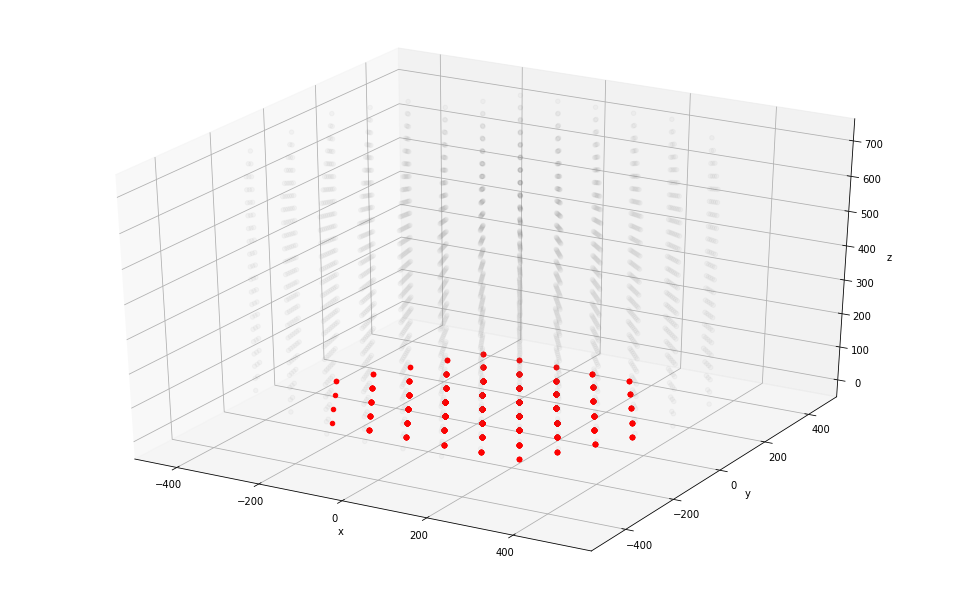

In [165]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,8))
ax = Axes3D(fig)
#ax.scatter(l_i, l_j, l_k , alpha=0.3)
#ax.scatter(lol[:,0], lol[:,1], lol[:,2], alpha=0.2)
#ax.scatter(lattice["x"], lattice["y"], lattice["z"])

ax.scatter(l_doms["x"], l_doms["y"], l_doms["z"], color="grey", alpha=0.05)
for i in range(60):
    for k in range(18):
        ax.scatter(l_doms[k*i]["x"], l_doms[k*i]["y"], color="red")
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(30, 60)
plt.show()


In [143]:
import matplotlib.pyplot as plt

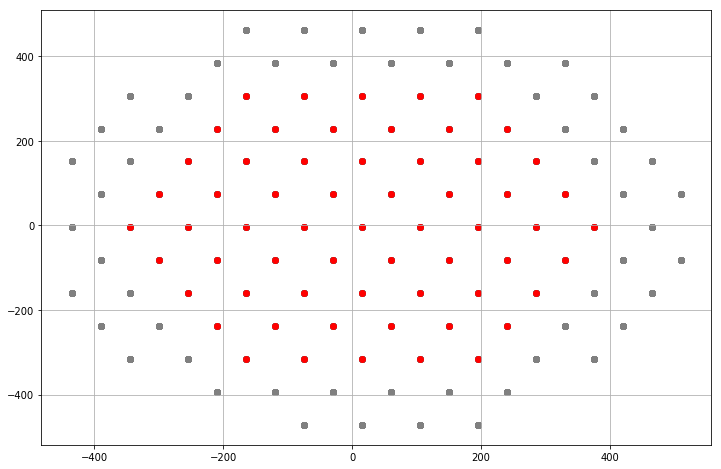

In [166]:
f = plt.figure(figsize=(12,8))
plt.scatter(l_doms["x"], l_doms["y"], color="grey")
for i in range(61):
    plt.scatter(l_doms[i*18]["x"], l_doms[i*18]["y"], color="red")
plt.grid()
plt.show()